In [1]:
### Hit calling analysis of the Hela dmem data set for the PERISCOPE manuscript. ###
### Script by Meraj Ramezani(mramezan@broadinstitute.org) ###
# Import relevant librariesimport pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

%matplotlib inline  

In [2]:
# Import the Hela dmem guide level normalized feature-selected median-aggregated profiles 
df = pd.read_csv("(input the file address)/20210422_6W_CP257_guide_normalized_feature_select_median_merged_ALLBATCHES___DMEM___ALLWELLS.csv.gz")
filename = '(input the file address)/wgs_guide_list.csv'
guide_df = pd.read_csv(filename)
cp257_guide_df = guide_df.query('dialout == 1 | dialout ==3')
cp257_guide_list = list(cp257_guide_df['sgRNA'])
df = df[df["Metadata_Foci_Barcode_MatchedTo_Barcode"].isin(cp257_guide_list)]
df.head()

,Metadata_Foci_Barcode_MatchedTo_GeneCode,Metadata_Foci_Barcode_MatchedTo_Barcode,Cells_AreaShape_CentralMoment_0_3,Cells_AreaShape_CentralMoment_1_0,Cells_AreaShape_CentralMoment_1_2,Cells_AreaShape_CentralMoment_2_1,Cells_AreaShape_CentralMoment_2_3,Cells_AreaShape_Compactness,Cells_AreaShape_Eccentricity,Cells_AreaShape_Extent,...,Nuclei_Texture_SumVariance_DAPI_Painting_10_02_256,Nuclei_Texture_SumVariance_DAPI_Painting_10_03_256,Nuclei_Texture_SumVariance_Mito_10_03_256,Nuclei_Texture_SumVariance_Mito_5_01_256,Nuclei_Texture_SumVariance_Phalloidin_10_01_256,Nuclei_Texture_SumVariance_Phalloidin_10_03_256,Nuclei_Texture_SumVariance_Phalloidin_5_01_256,Nuclei_Texture_SumVariance_WGA_10_01_256,Nuclei_Texture_SumVariance_WGA_10_03_256,Nuclei_Texture_SumVariance_WGA_5_01_256
0,A1BG,CAAGAGAAAGACCACGAGCA,0.016441,-0.000100,-0.138460,0.003857,0.001038,0.98008,0.788680,-0.39281,...,-0.68377,-0.48894,-0.048677,-0.028407,-0.105700,-0.240800,-0.181300,-0.28261,-0.219630,-0.428860
1,A1BG,CATCTTCTTTCACCTGAACG,0.008520,0.171140,0.000794,0.006531,0.000064,0.29330,0.521390,0.18850,...,0.31212,0.35947,-0.154080,-0.017084,-0.076653,-0.022525,-0.009099,-0.29626,-0.163430,-0.488400
2,A1BG,CTCCGGGGAGAACTCCGGCG,-0.002752,-0.267570,-0.000020,-0.001949,-0.009853,0.18872,0.085372,0.26053,...,-0.11342,-0.32553,-0.008285,-0.032883,-0.006471,-0.175300,0.008365,-0.38693,-0.139000,-0.308780
3,A1BG,TGGAAGTCCACTCCACTCAG,-0.002541,-0.010418,-0.000956,0.011877,0.000071,-0.12824,-0.334610,0.07232,...,-0.44236,-0.22552,-0.048856,-0.050878,-0.022580,-0.050792,-0.038298,-0.14036,0.252750,0.008285
4,A1CF,AGTTATGTTAGGTATACCCG,0.004307,0.037445,-0.032165,-0.002427,0.000261,-0.36232,0.478180,-0.12329,...,-0.22953,-0.43204,-0.003427,-0.064101,0.136110,0.061535,-0.134130,-0.26887,0.023397,-0.261620


In [3]:
# Change the feature names into integer values to facilitate the computations
features = list(df.columns)[2:]
features_dic_forward = {features[i] : i for i in range(len(features))}
features_dic_reverse = {i : features[i] for i in range(len(features))}
features[:10]
df_int_feats = df.rename(columns=features_dic_forward)
df_str_feats = df_int_feats.rename(columns=features_dic_reverse)
df_int_feats

,Metadata_Foci_Barcode_MatchedTo_GeneCode,Metadata_Foci_Barcode_MatchedTo_Barcode,0,1,2,3,4,5,6,7,...,1587,1588,1589,1590,1591,1592,1593,1594,1595,1596
0,A1BG,CAAGAGAAAGACCACGAGCA,0.016441,-0.000100,-0.138460,0.003857,0.001038,0.980080,0.788680,-0.392810,...,-0.68377,-0.48894,-0.048677,-0.028407,-0.105700,-0.240800,-0.181300,-0.28261,-0.219630,-0.428860
1,A1BG,CATCTTCTTTCACCTGAACG,0.008520,0.171140,0.000794,0.006531,0.000064,0.293300,0.521390,0.188500,...,0.31212,0.35947,-0.154080,-0.017084,-0.076653,-0.022525,-0.009099,-0.29626,-0.163430,-0.488400
2,A1BG,CTCCGGGGAGAACTCCGGCG,-0.002752,-0.267570,-0.000020,-0.001949,-0.009853,0.188720,0.085372,0.260530,...,-0.11342,-0.32553,-0.008285,-0.032883,-0.006471,-0.175300,0.008365,-0.38693,-0.139000,-0.308780
3,A1BG,TGGAAGTCCACTCCACTCAG,-0.002541,-0.010418,-0.000956,0.011877,0.000071,-0.128240,-0.334610,0.072320,...,-0.44236,-0.22552,-0.048856,-0.050878,-0.022580,-0.050792,-0.038298,-0.14036,0.252750,0.008285
4,A1CF,AGTTATGTTAGGTATACCCG,0.004307,0.037445,-0.032165,-0.002427,0.000261,-0.362320,0.478180,-0.123290,...,-0.22953,-0.43204,-0.003427,-0.064101,0.136110,0.061535,-0.134130,-0.26887,0.023397,-0.261620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84267,nontargeting,TTTATGCATTTAATACGCCG,0.001273,0.018101,0.000890,0.001313,-0.000374,-0.055722,0.099351,0.069365,...,-0.23705,-0.20256,-0.031417,-0.037462,-0.114560,-0.132490,-0.107730,-0.17507,-0.217230,-0.070118
84268,nontargeting,TTTCTAGTTACTACTGGACG,0.000851,0.007969,-0.002324,0.001188,-0.000311,-0.069128,-0.055467,0.052259,...,-0.22518,-0.24198,-0.070424,-0.033117,-0.123770,-0.146650,-0.123340,-0.19341,-0.172650,-0.156660
84269,nontargeting,TTTGGCAGTACCTTTTATTA,-0.002488,-0.020554,-0.002961,0.001481,-0.000375,-0.145710,0.007123,0.134060,...,-0.24169,-0.25947,-0.097440,-0.045132,-0.129210,-0.142610,-0.131210,-0.13088,-0.176260,-0.191660
84270,nontargeting,TTTTACCTTGTTCACATGGA,-0.001427,0.018769,-0.001960,-0.001710,-0.000271,-0.124700,0.070634,0.011164,...,-0.16827,-0.20667,-0.107190,-0.053795,-0.105610,-0.130490,-0.109310,-0.24267,-0.220700,-0.218470


In [5]:
# Extract the expression data from the Broad Institute Dependency Map data set
express = pd.read_csv("(input the file address)/CCLE_expression_hela.csv")

for i in range(len(express.index)):
    express.iloc[i,0] = express.iloc[i,0].split()[0]

express_min , express_max = express['HELA_CERVIX'].min(), express['HELA_CERVIX'].max()

express = express.sort_values(by = ['Unnamed: 0']).set_index('Unnamed: 0')

express

,HELA_CERVIX
Unnamed: 0,
A1BG,0.443607
A1BG-AS1,0.389567
A1CF,0.000000
A2M,4.858976
A2M-AS1,0.887525
...,...
ZYX,7.208088
ZYXP1,0.000000
ZZEF1,3.184280


In [6]:
# Extract the expression data from the Broad Institute Dependency Map data set
all_genes_list = list(df.Metadata_Foci_Barcode_MatchedTo_GeneCode.unique())
zero_express = express.query('HELA_CERVIX == 0')
zero_express_list = list(zero_express.index)

zero_tpm = [value for value in zero_express_list if value in all_genes_list]
zero_tpm = sorted(list(set(zero_tpm)))


expressed_gene_list = [value for value in all_genes_list if value not in zero_tpm]
expressed_gene_list.remove('nontargeting')

print(len(zero_express_list),len(all_genes_list),len(zero_tpm),len(expressed_gene_list))

33120 20394 3665 16728


In [8]:
# Function to calculate U statistics and p-values using Mann-Whitney U test for each feature

def calculate_stats(feature_list, gene_list, df_genes):
    # 
    df_p_values_feature = pd.DataFrame(index=gene_list,columns=feature_list)
    df_u_values_feature = pd.DataFrame(index=gene_list,columns=feature_list)
    
    gene_counter = 0
    
    for feat in feature_list:
        list_p = []
        list_u = []
        for gene in gene_list: 
            gene_counter += 1
            if gene_counter % len(gene_list) == 0:
                print(f'now calculating feature number {gene_counter/len(gene_list)}')
        
            u, p = ss.mannwhitneyu(df_genes.query('Metadata_Foci_Barcode_MatchedTo_GeneCode == "nontargeting"')[feat],
                    df_genes.query('Metadata_Foci_Barcode_MatchedTo_GeneCode == @gene')[feat])
        
            list_p.append(p)
            list_u.append(u)
        
        df_p_values_feature[feat] = list_p
        df_u_values_feature[feat] = list_u
    
    df_u_values_feature = df_u_values_feature.apply(pd.to_numeric)
    df_p_values_feature = df_p_values_feature.apply(pd.to_numeric)
    
    df_p_values_feature.loc['sig_gene_count'] = 0
    
    for i in range(len(df_p_values_feature.columns)):
        count = 0
        for j in range(len(df_p_values_feature.index)-1):
            if df_p_values_feature.iloc[j,i] <= p_value:
                count +=1
        df_p_values_feature.iloc[len(df_p_values_feature.index)-1,i] = count

    return df_u_values_feature , df_p_values_feature


In [9]:
# Define the constants required for the rest of the analysis
gene_group = 'whole_genome_median'
p_value = 0.001

df_genes = df_int_feats.query("Metadata_Foci_Barcode_MatchedTo_GeneCode != 'nontargeting'")
genes = list(df_genes.Metadata_Foci_Barcode_MatchedTo_GeneCode.unique())
len(genes)
features_int = list(df_genes.columns)[2:]
features_int[:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

now calculating feature number 1.0
now calculating feature number 2.0
now calculating feature number 3.0
now calculating feature number 4.0
now calculating feature number 5.0
now calculating feature number 6.0
now calculating feature number 7.0
now calculating feature number 8.0
now calculating feature number 9.0
now calculating feature number 10.0
now calculating feature number 11.0
now calculating feature number 12.0
now calculating feature number 13.0
now calculating feature number 14.0
now calculating feature number 15.0
now calculating feature number 16.0
now calculating feature number 17.0
now calculating feature number 18.0
now calculating feature number 19.0
now calculating feature number 20.0
now calculating feature number 21.0
now calculating feature number 22.0
now calculating feature number 23.0
now calculating feature number 24.0
now calculating feature number 25.0
now calculating feature number 26.0
now calculating feature number 27.0
now calculating feature number 28.0
n

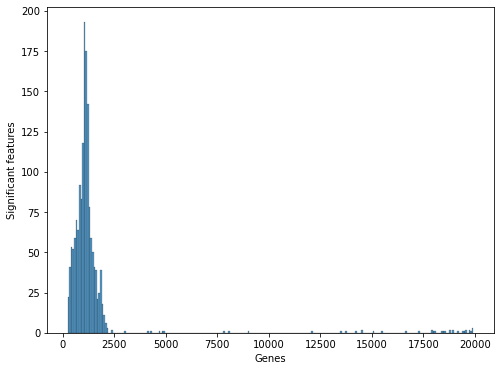

In [10]:
# Perform the calculations, save the results and visualize the genral distribution
df_u_values , df_p_values = calculate_stats(features_int, genes, df_int_feats)

df_p_values.to_csv(f'cp257_dmem_sig_features_mann_whitney_{gene_group}_p_values.csv')
df_u_values.to_csv(f'cp257_dmem_sig_features_mann_whitney_{gene_group}_u_values.csv')

data = df_p_values.loc['sig_gene_count']
fig, ax = plt.subplots(1,1,figsize=(8,6))

ax = sns.histplot(data)
ax.set_ylabel('Significant features')
ax.set_xlabel('Genes')
plt.show()